# Bouncing Balls

### AIM - To implement a simple time driven model and visualise it

## Let's go:

This interactive notebook is part of a series which can be found here:

https://github.com/DimitriosAstro/Astronomy  
The notebook is distributed by Dimitrios Theodorakis under the GNU General Public License v3.0.  
Find more info at www.w3schools.com, www.python.org, www.learnpython.org  

Adapted from work by Tom Aldcroft, Tom Robitaille, Brian Refsdal, Gus Muench, Smithsonian Astrophysical Observatory  
https://python4astronomers.github.io/index.html

## Running the code:

*Shift+Enter* on a code snippet to run the code. Most of the time you'll have to run the snippets in order or you'll get an error.

If you're stuck you can consult the docs at https://docs.python.org/3/, and https://numpy.org/doc/stable/.  
You can also get advice from www.stackoverflow.com.
Remember to comment your code!

Now import everything we will need:

In [1]:
from numpy.random import default_rng       # numpy random value generator
import matplotlib.pyplot as plt            # plotting library matpotlib
import matplotlib.animation as animation   # matplotlib animations library
from IPython.display import HTML, Image    # to convert our animation to HTML for display
# needed to run matplotlib on JupyterLab
%matplotlib inline 

## Setting up our Variables
After you import the libraries we need you should set up your variables and constants.

We are going to make an animation of some Bouncing Balls using the matplotlib plotting library.

First we define our ball properties. We need the number of balls, their position, velocity, and size.

**Hint** - Try printing some of these variable to see their shape.

In [2]:
n = 10 # number of balls
rng = default_rng() # random number generator
pos = (20 * rng.random(n*2) - 10).reshape(n, 2) # positions, this is a 2-D array becuase we need x and y positions
vel = (0.3 * rng.random(size=n*2)).reshape(n, 2) # velocities, again 2-D for velocities in the x and y directions

# lets define the marker sizes as well for our plot
# create an array of length n with random numbers, Hint - times it by 100 and also add 100 to make the markers a decent size
# Your code here:
sizes = 100 * rng.random(n) + 100 # balls with random sizes

# set up random colours for our balls
colors = rng.random([n, 4])

## Setting up the Plot

Plotting with matplotlib is simple enough. Matplotlib is a very powerful tool which we will be using alongside other plotting libraries to make scatter plots, line plots, and other visualisations.

https://matplotlib.org/

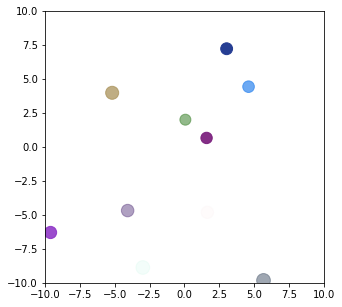

In [3]:
# set up the initial plot to be updated by the animation
# set up your first figure, Figure 1 so num=1, declare a figure size
fig = plt.figure(num=1, figsize=(5,5))
# set up the axes and their limits (lower, upper)
ax = plt.axes(xlim=(-n,n), ylim=(-n,n))
# plot the balls start positions
# plt.scatter(x,y) where we have added details about the marker/point design, size, and colour
circles = plt.scatter(pos[:,0], pos[:,1], marker='o', s=sizes, c=colors)

## Defining a Function

Now we have the initial positions of our balls on a pretty plot. We are going to define a function to animate it.

Functions are defined like this:
```python
def myFucntion(x):
    y = x**2
    return y
```
This function takes a variable x, and returns the square of that variable.  
We can call the function by typing:
```python
myFunction(2)
```
This would return 2 squared.

Our function is a bit more complicated:

In [4]:
def animate(i):
    # This global declaration lets us alter the pos variable which we defined outside of this function
    global pos                  
    # This is shorthand for pos = pos+vel, we are updating our positions using the velocities
    pos += vel
    # Find balls that are outside walls
    # This returns an array of True and False, True where the abs(pos) value is greater than 10
    bounce = abs(pos) > 10      
    # Bounce if outside the walls (ie change the direction of their velocities)
    # An example of using a mask to change only the elements which meet a certain criteria
    # In this case it will only change the sign of velocities for balls where bounce is True
    vel[bounce] = -vel[bounce]  
    circles.set_offsets(pos)    # Update the positions of our balls
    return circles              # Return the updated scatter plot

## Animating

Now we can animate our plot using the animate function.  
We already have our starting plot so the animate function will update the plot for us.

We will use the ```animation.FuncAnimation()``` function to automate this process.

It takes the figure to animate (fig), the animation function (animate), the number of frames, and the frame interval in ms as arguments:

In [5]:
anim = animation.FuncAnimation(fig, animate, frames=100, interval=100)

To display the animation in an interactive notebook we have to use:

In [7]:
HTML(anim.to_jshtml())

In the **.py** version of this file the ```to_jshtml()``` function call is not necessary and we use the standard way of showing plots using ```plt.show()``` after the anim variable declaration.  
The **.py** version also includes an ```anim.save()``` call which lets you save the animation as a gif (this requires that you've installed the program ImageMagick).

## Saving the Animation in Jupyter

The following code lets us save the animation in Jupyter:  
(This may take a few minutes)

In [9]:
anim.save('bouncingBalls.gif', writer='imagemagick', fps=60)

You should now see the file **bouncingBalls.gif** in the file pane on the right!   
Let's load it:

In [10]:
Image(url="bouncingBalls.gif")

# Challenge

Take this base code and update it somehow.  
Some suggestions as follows:

* Change the markers to Hexagons
* Destroy balls which hit the edges
* If balls hit the edges move them to the opposite side (wrap the walls)
* Introduce gravity

In [ ]:
# Decide in your pair what you are going to change then add code below
# Remember google is your friend as is stackoverflow and the matplotlib docs
# Your code here:
